In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Шаг 1: Генерация случайных точек вокруг двух центров кластеризации
np.random.seed(42)
center1 = np.array([2, 2])
center2 = np.array([-2, -2])
cluster1 = center1 + np.random.randn(30, 2)
cluster2 = center2 + np.random.randn(30, 2)
# Объединение точек в один набор данных
data = np.vstack([cluster1, cluster2])

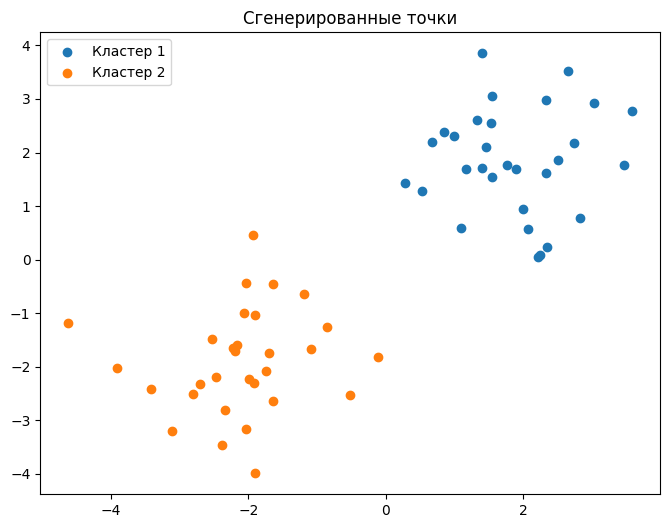

In [3]:
# Визуализация после генерации точек
plt.figure(figsize=(8, 6))
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='Кластер 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], label='Кластер 2')
plt.title('Сгенерированные точки')
plt.legend()
plt.show()


In [4]:
# Нейронная сеть Кохонена
input_size = 2
output_size = 2
learning_rate = 0.5


In [5]:
# Инициализация весов
weights = np.random.rand(output_size, input_size)



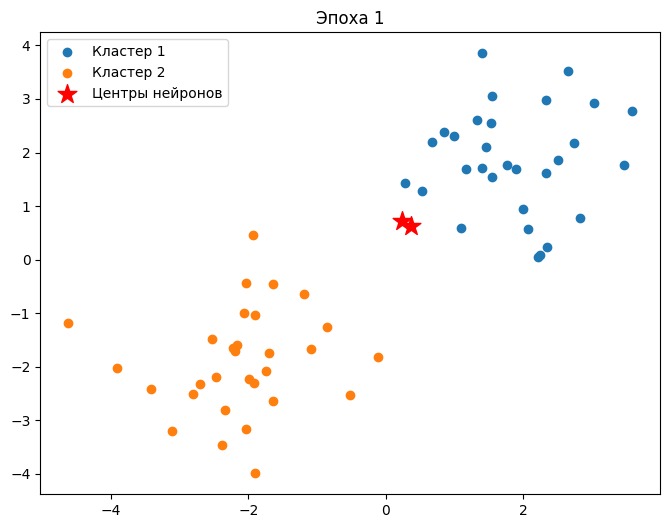

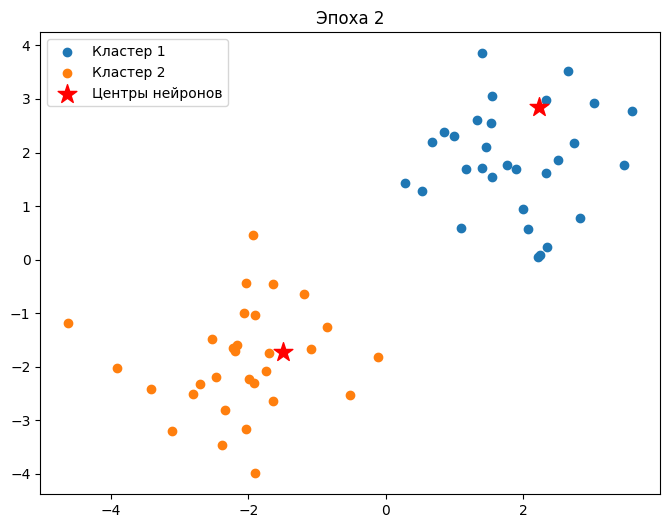

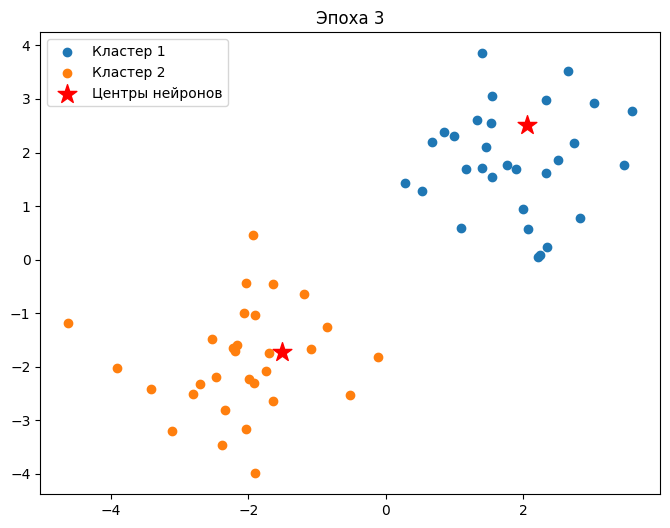

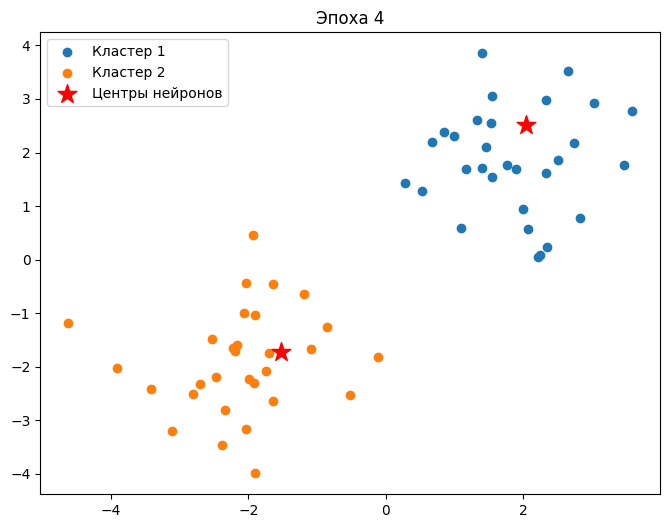

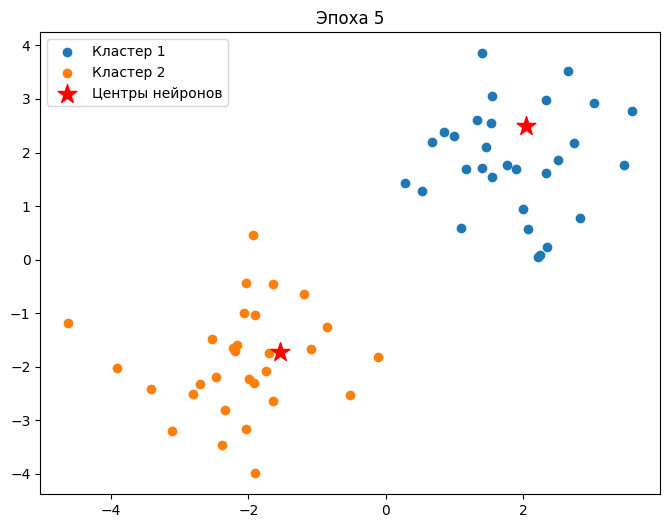

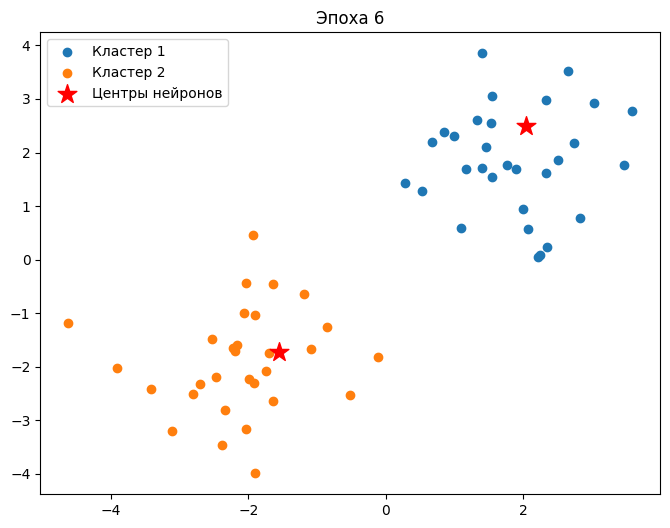

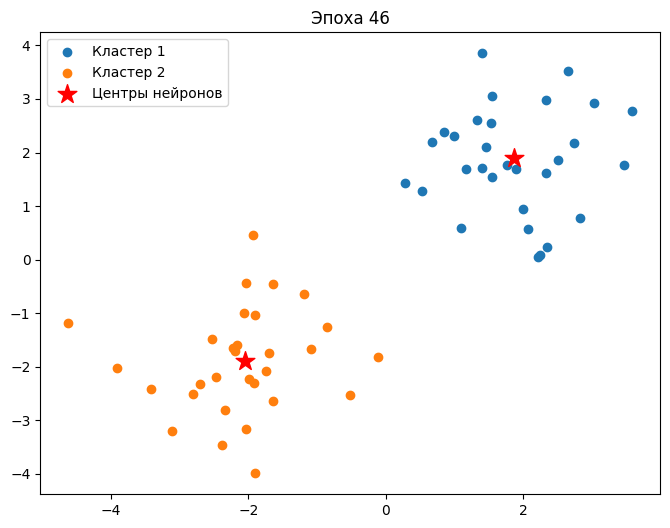

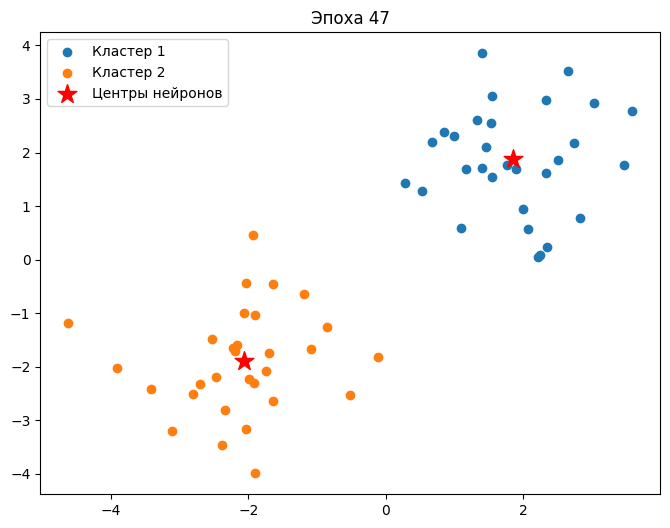

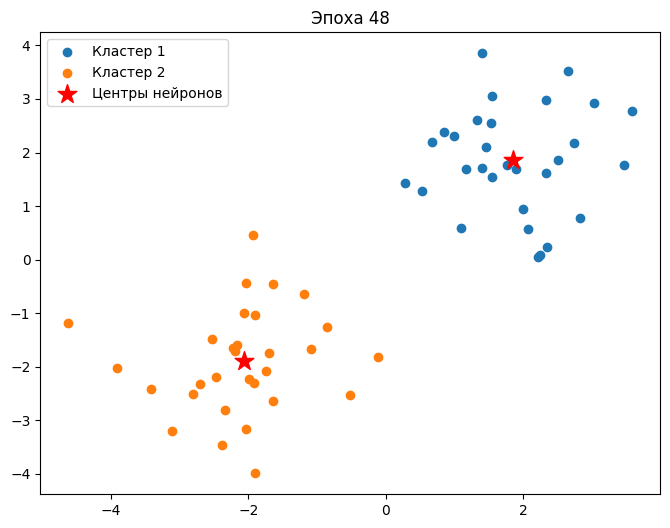

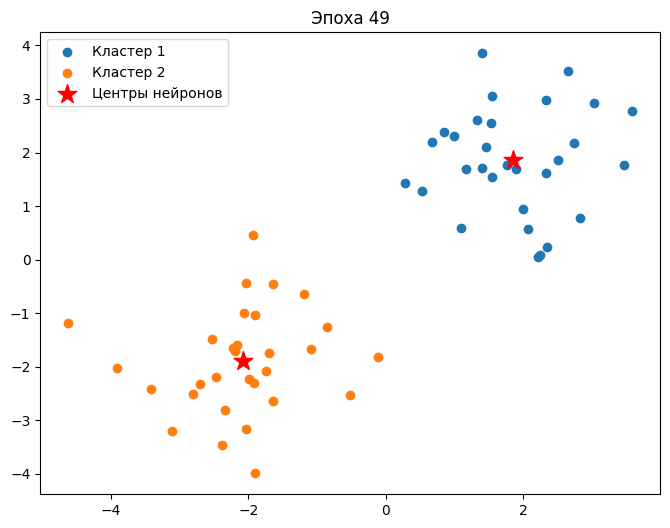

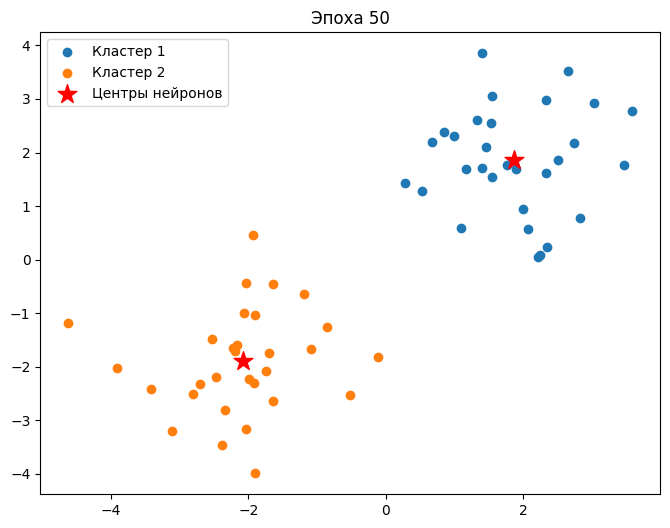

In [6]:
# Визуализация для указанных интервалов эпох
for epoch in range(50):
    if epoch in range(0, 6) or epoch in range(45, 49):
        plt.figure(figsize=(8, 6))
        plt.scatter(cluster1[:, 0], cluster1[:, 1], label='Кластер 1')
        plt.scatter(cluster2[:, 0], cluster2[:, 1], label='Кластер 2')
        plt.scatter(weights[:, 0], weights[:, 1], marker='*', s=200, c='red', label='Центры нейронов')
        plt.title(f'Эпоха {epoch + 1}')
        plt.legend()
        plt.show()

    for point in data:
        # Рассчитываем расстояние до каждого нейрона
        distances = np.linalg.norm(weights - point, axis=1)
        
        # Находим выигравший нейрон (с минимальным расстоянием)
        winner_neuron = np.argmin(distances)
        
        # Обновляем веса только для выигравшего нейрона
        weights[winner_neuron] += learning_rate * (point - weights[winner_neuron])

        # Уменьшаем коэффициент обучения
        learning_rate = (50 - epoch) / 100


In [7]:
# После обучения можно использовать сеть для классификации точек
def predict(point):
    distances = np.linalg.norm(weights - point, axis=1)
    return np.argmin(distances)

In [8]:
# Проверка точек
for point in data:
    prediction = predict(point)
    print(f"Точка {point} принадлежит кластеру {prediction}")


Точка [2.49671415 1.8617357 ] принадлежит кластеру 0
Точка [2.64768854 3.52302986] принадлежит кластеру 0
Точка [1.76584663 1.76586304] принадлежит кластеру 0
Точка [3.57921282 2.76743473] принадлежит кластеру 0
Точка [1.53052561 2.54256004] принадлежит кластеру 0
Точка [1.53658231 1.53427025] принадлежит кластеру 0
Точка [2.24196227 0.08671976] принадлежит кластеру 0
Точка [0.27508217 1.43771247] принадлежит кластеру 0
Точка [0.98716888 2.31424733] принадлежит кластеру 0
Точка [1.09197592 0.5876963 ] принадлежит кластеру 0
Точка [3.46564877 1.7742237 ] принадлежит кластеру 0
Точка [2.0675282  0.57525181] принадлежит кластеру 0
Точка [1.45561728 2.11092259] принадлежит кластеру 0
Точка [0.84900642 2.37569802] принадлежит кластеру 0
Точка [1.39936131 1.70830625] принадлежит кластеру 0
Точка [1.39829339 3.85227818] принадлежит кластеру 0
Точка [1.98650278 0.94228907] принадлежит кластеру 0
Точка [2.82254491 0.77915635] принадлежит кластеру 0
Точка [2.2088636  0.04032988] принадлежит клас

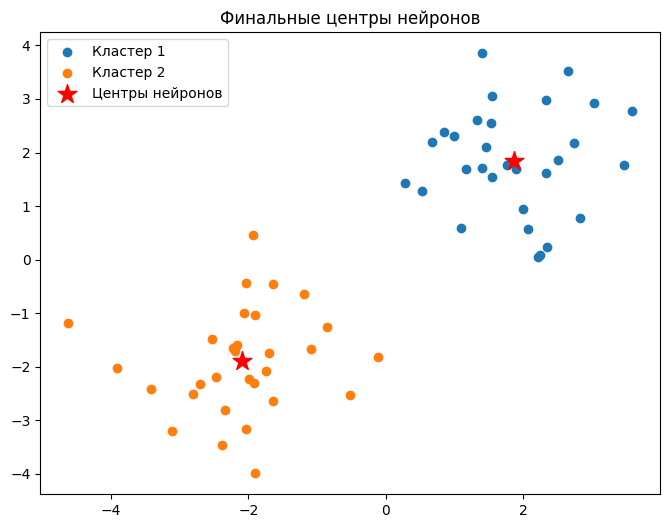

In [9]:
# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='Кластер 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], label='Кластер 2')
plt.scatter(weights[:, 0], weights[:, 1], marker='*', s=200, c='red', label='Центры нейронов')
plt.title('Финальные центры нейронов')
plt.legend()
plt.show()